# Small World Network for the Fashion Domain 

## Contents

1. [Overview](#overview)
2. [WARNING: Very important note](#warning)
3. [Kickstarting the pipeline](#pipeline)
4. [Analysing and understanding the individual extracted features](#feature_analysis)
  1. [Visualizing the 5-NN according to the HoC feature](#hoc)
  2. [Visualizing the 5-NN according to the HoG feature](#hog)
  3. [Visualizing the 5-NN according to the VGG16 block2_pool intermediate layer](#block2)
  4. [Visualizing the 5-NN according to the VGG16 block3_pool intermediate layer](#block3)
  5. [Visualizing the 5-NN according to the VGG16 block4_pool intermediate layer](#block4)
5. [Visualizing the generated graph and analysing the relations inside cluster-like agglomerations](#graph)
6. [Analysing graph statisticals metrics](#metrics)
7. [Visualizing smaller scale examples of image relations](#node_neighbours)
8. [Visualizing shortest paths between two images](#shortest_paths)
  

## <a name="overview"></a>Overview

With the widespread presence of e-commerce, the online fashion business is looking for new ways to satisfy their consumers' needs.

One of the main concerns of this industry is providing the consumers with a selection of relevant products. This can be done by relating items with a similar set of attributes to each other. Another problem is that clothing databases contain vast catalogues of items, making it extremely hard for the consumer to navigate through all the clothes in an quick and efficient manner.

This project aims to tackle these challenging problems by **relating hundreds of clothing items to each other and organizing them in a structure that allows their quick and efficient browsing, preferably with a minimal number of clicks**.




## <a name="warning"></a>WARNING: Very important note

If you run into some errors while running this notebook, it is most likely due to the corruption of some storage files. As such, **if you run into any errors, you should run the following code**, which will run the whole pipeline and update all the feature and distance matrices:

```
from Code.SmallWorldGraph import SmallWorldGraph
from Code.DataManager import DataManager as dm
from Code.Constants import VGG16_BLOCK2_POOL_LAYER, VGG16_BLOCK3_POOL_LAYER, VGG16_BLOCK4_POOL_LAYER

print("Imports Finished!")

sw = SmallWorldGraph(update=True, compute_final_distances=False, 
                     layers=[VGG16_BLOCK2_POOL_LAYER])

print("Ran layer 2!")

sw = SmallWorldGraph(update=True, compute_final_distances=False, 
                     layers=[VGG16_BLOCK3_POOL_LAYER])

print("Ran layer 3!")

sw = SmallWorldGraph(update=True, compute_final_distances=False, 
                     layers=[VGG16_BLOCK4_POOL_LAYER])

print("Ran layer 4!")

sw = SmallWorldGraph(update=False, compute_final_distances=True, 
                     layers=[VGG16_BLOCK2_POOL_LAYER, VGG16_BLOCK3_POOL_LAYER, VGG16_BLOCK4_POOL_LAYER])

print("Created graph!")
```

If, indeed, you ran into some errors, after running this code they should have been fixed and you should be able to proceed with the notebook.

**Do not run this code under normal circunstances, because it will take around 30-45 minutes to run on a cluster with a GPU.** For this reason, the code was placed in the block above and, to run it, you should paste it into a code cell.


## <a name="pipeline"></a>Kickstarting the pipeline

We start by loading the modules that are necessary to run our project. Then, we instantiate our `SmallWorldGraph`, which kickstarts the whole pipeline. 

It is important to note that, because we stored the outputs from previous runs in files, we run our model with both the `update` and `compute_final_distances` flags set to `False`. These flags are responsible, respectively, for deciding whether or not the features should be recomputed, and whether the final distantes should be recalculated.

In [1]:
from Code.SmallWorldGraph import SmallWorldGraph
from Code.DataManager import DataManager as dm
from Code.Constants import VGG16_BLOCK2_POOL_LAYER, VGG16_BLOCK3_POOL_LAYER, VGG16_BLOCK4_POOL_LAYER

print("Imports Finished!")

sw = SmallWorldGraph(update=False, compute_final_distances=False, 
                     layers=[VGG16_BLOCK2_POOL_LAYER, VGG16_BLOCK3_POOL_LAYER, VGG16_BLOCK4_POOL_LAYER])

print("Created graph!")

Imports Finished!
Created graph!


## <a name="feature_analysis"></a>Analysing and understanding the individual extracted features

Below, we show a representation of the 5 nearest neighbours of a few images, according to a feature specific distance.

### <a name="hoc"></a>Visualizing the 5-NN according to the HoC feature

(24, img_024.jpg)


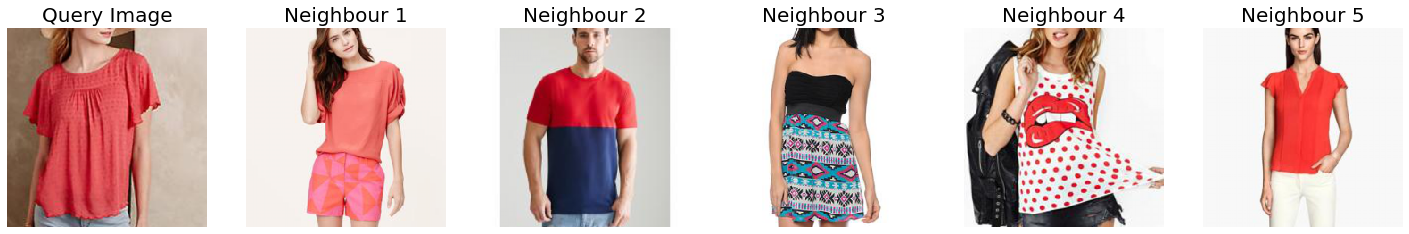

In [17]:
sw.show_feature_neighbours(dm.get_img_index("img_024.jpg"), graph_name="img024_colors.pdf", k=6,
                           feat='colors')


As you can see, most of the neighbour images retrieved have clear **red/pink tones** to their color. This is precisely what we can expect from a feature that focuses solely on the color aspect of the images.

### <a name="hog"></a>Visualizing the 5-NN according to the HoG feature

(57, img_057.jpg)


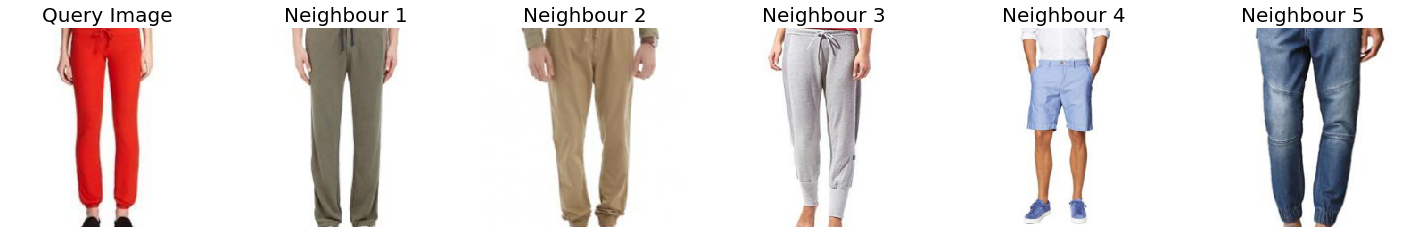

In [21]:
sw.show_feature_neighbours(dm.get_img_index("img_057.jpg"), graph_name="img057_grads.pdf", k=6,
                           feat='grads')


One of the strong suits of the HoG feature is edge detection. This is clear in this example, because all of the neighbours that were retrieved have the **same overall shape** of the query image. This happens because there tends to be a sudden change of intensity on the edges or corners of an object.

### <a name="block2"></a>Visualizing the 5-NN according to the VGG16 block2_pool intermediate layer

(57, img_057.jpg)


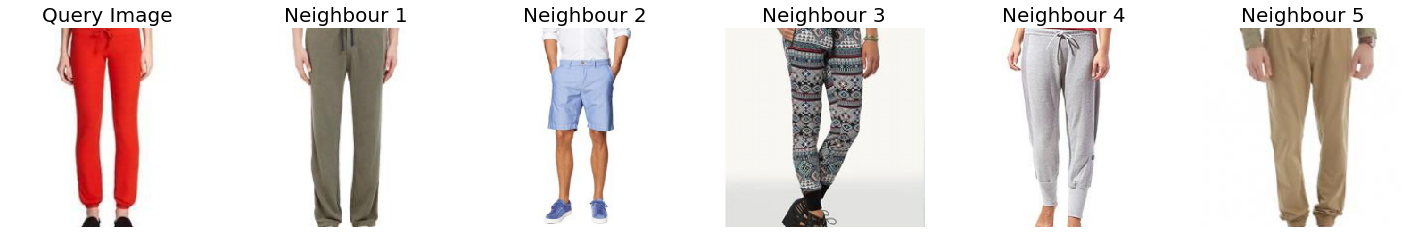

In [22]:
sw.show_feature_neighbours(dm.get_img_index("img_057.jpg"), graph_name="img057_block2.pdf", k=6,
                           feat=VGG16_BLOCK2_POOL_LAYER)


The lower level layers of the VGG16 are well suited for **edge detection**. Just like the HoG feature, this feature can detect the shape of the clothing item. As such, all the retrieved neighbours are pants and shorts (lower-body clothing), just like the query image.

### <a name="block3"></a>Visualizing the 5-NN according to the VGG16 block3_pool intermediate layer

(6, img_006.jpg)


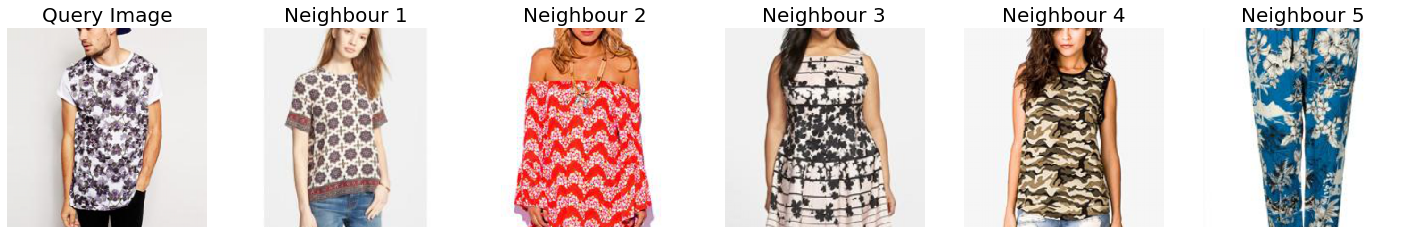

In [4]:
sw.show_feature_neighbours(dm.get_img_index("img_006.jpg"), graph_name="img006_block3.pdf", k=6,
                           feat=VGG16_BLOCK3_POOL_LAYER)


### <a name="block4"></a>Visualizing the 5-NN according to the VGG16 block4_pool intermediate layer

(15, img_015.jpg)


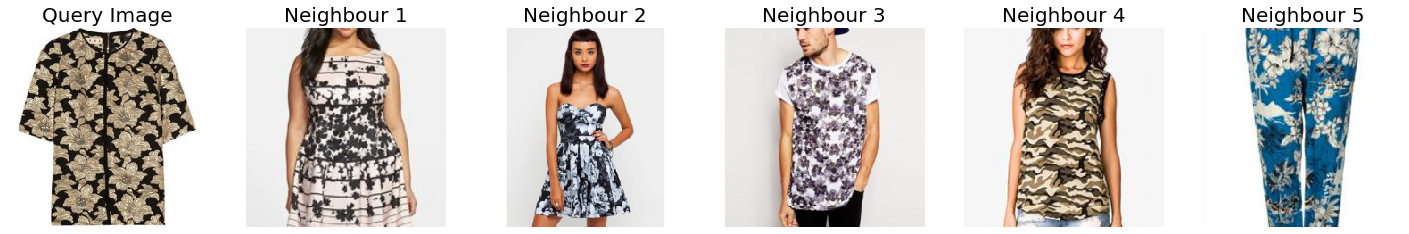

In [5]:
sw.show_feature_neighbours(dm.get_img_index("img_015.jpg"), graph_name="img015_block4.pdf", k=6,
                           feat=VGG16_BLOCK4_POOL_LAYER)


The higher layers of the VGG16, like block3_pool and block4_pool, are better suited for **pattern detection**. As can be seen in the examples above, the retrieved neighbours clearly present very noticeable patterns, just like the query images.

## <a name="graph"></a>Visualizing the generated graph and analysing the relations inside cluster-like agglomerations

Below, we show a visual representation of the generated graph, containing 100 images of pieces of clothing.
It is important to note that, before generating the final graph, we tuned a parameter that dictates how many nearest neighbour edges should be added to each node. The value chosen was **3**. The reasons for this choice are detailed in our report.

**Note:** Each time you run the following line of code the visual representation of the graph changes. As such, if you run it, the comments below the graph may not make sense. **So please, run this line of code only if strictly necessary.**

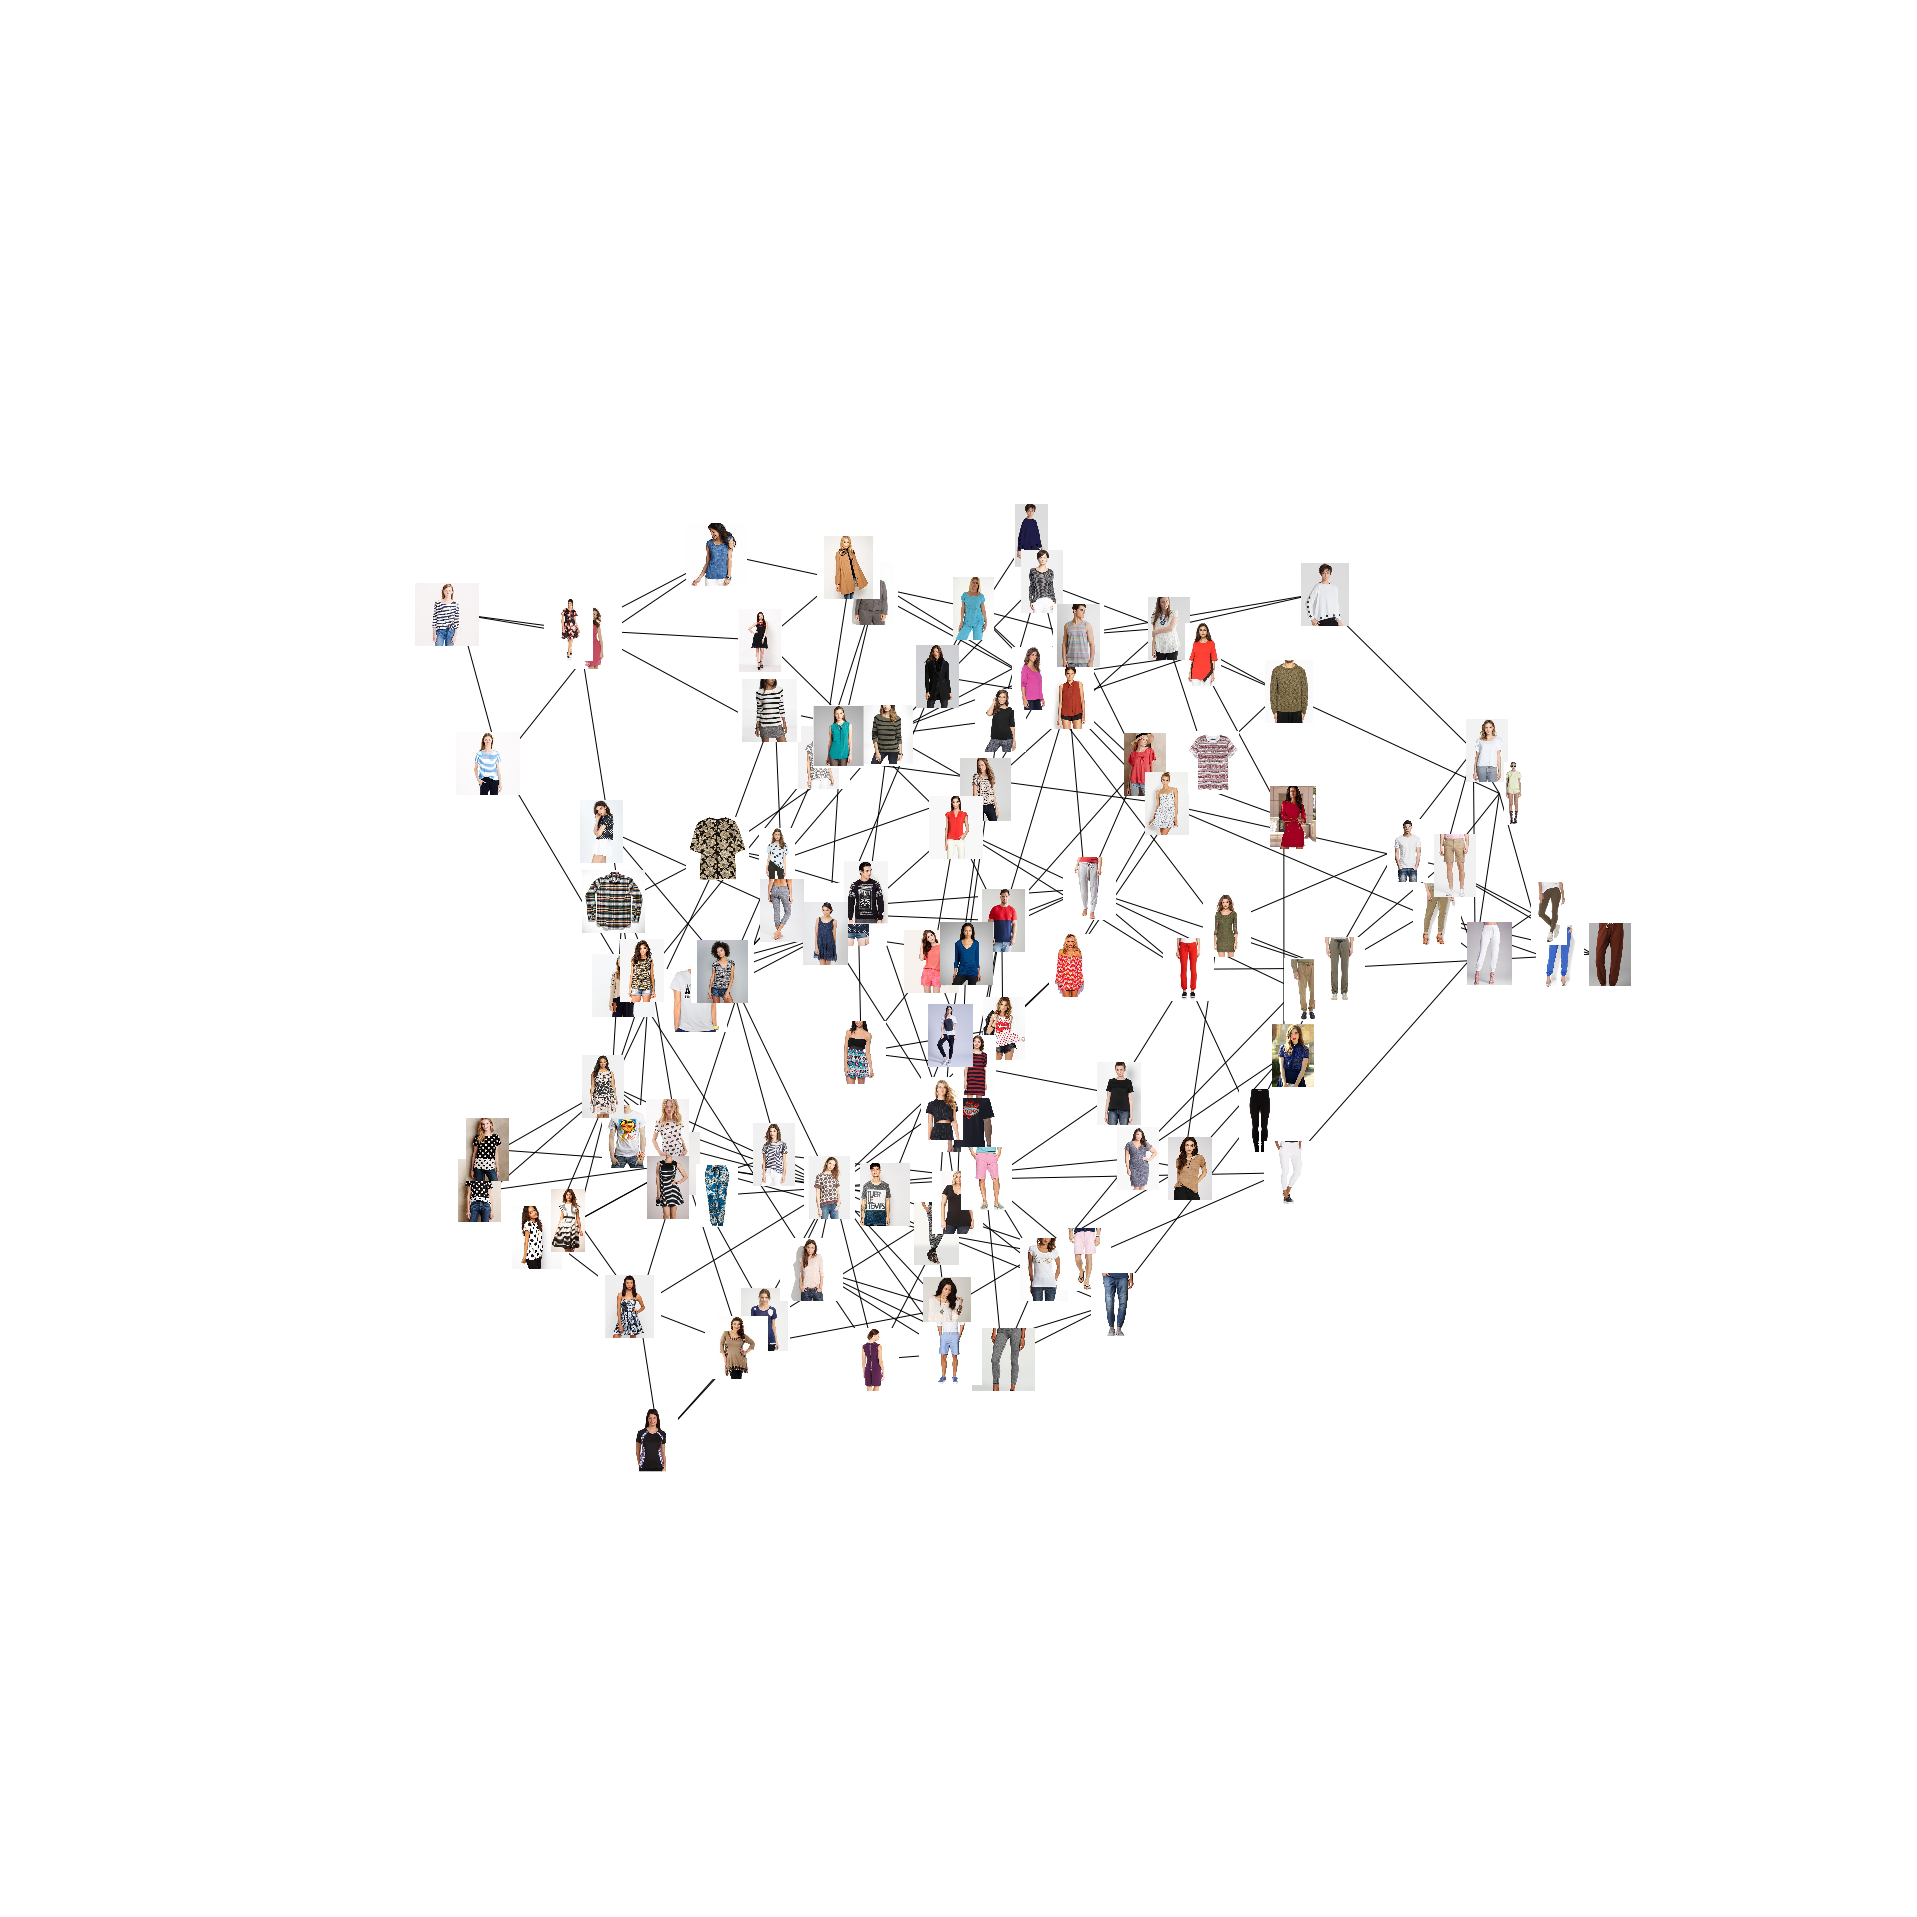

In [49]:
sw.show_full_graph(img_size=0.025)

This graph is able to visually represent several characteristics of the pieces of clothing. As we can see, there are **cluster-like agglomerations** that seem to share a common trait. For example:
* In the right region of the graph, it is possible to observe a **small cluster of pants**, clearly agglomerated by some kind of edge/shape detection feature;
* In the center left and bottom left regions, we can see a **larger agglomeration of clothing with strong patterns**, which are most likely joined due to the pattern detection features. Note also that the colors of the images in this region have clear black, white and brown tones;
* In the center and top right regions of the graph, we can see some **red/pink toned images closer together**, probably brought together by a color feature;
* Finally, in the top left region, there are **some striped shirts**, which were most likely agglomerated by a pattern detection feature.


## <a name="metrics"></a>Analysing graph statisticals metrics

Below, we present some metrics of the generated graph. These metrics were mainly used to tune the parameter that dictates how many nearest neighbour edges should be added to each node (K).


In [36]:
sw.print_graph_metrics()
sw.print_small_world_measure()

---------- ------ Metrics ------ ----------
Number of Nodes: 100
Number of Edges: 243
---------- ---------- ---------- ----------
Connected Graph: True
---------- ---------- ---------- ----------
Average Node Degree: 4.86
Average Shortest Path Length: 3.432121212121212
Average Clustering Coefficient: 0.3280172400698716
Small World Measure: 0.3024652357268689


The most important things to mention are:
* The average node degree is above the value of K (3). This means that there are some images that are neighbours to several others, acting as **hubs**, nodes with a large amount of connections that help keep the average shortest path length low;
* The shortest path length is low, meaning that the dataset can be easily navigated from one end to another, with around 3.4 hops;
* The average clustering coefficient is relatively low. Roughly speaking this measure tells us how well connected the neighborhoods of all the nodes are. Because in our graph there are several small and sparse clusters, the neighbourhoods don't have many connections and, as such, the value is closer to 0 than to 1;
* With a small-world measure of 0.3, we believe that our graph presents some of the Small World properties.

**Note 1:** The average clustering coefficient and the small-world measure are computed by generating random and lattice graphs and comparing them to our graph. As such, it is only normal that these values vary from run to run.

**Note 2:** If the number of nodes is increased by adding more images to the dataset, the parameter K should be tuned again, in order to guarantee that the graph remains connected and still possesses the properties of a Small World Network.

## <a name="node_neighbours"></a>Visualizing smaller scale examples of image relations

Below, we show a visual representation of some nodes and their graph neighbours, according to the final computed distance.

(25, img_025.jpg)


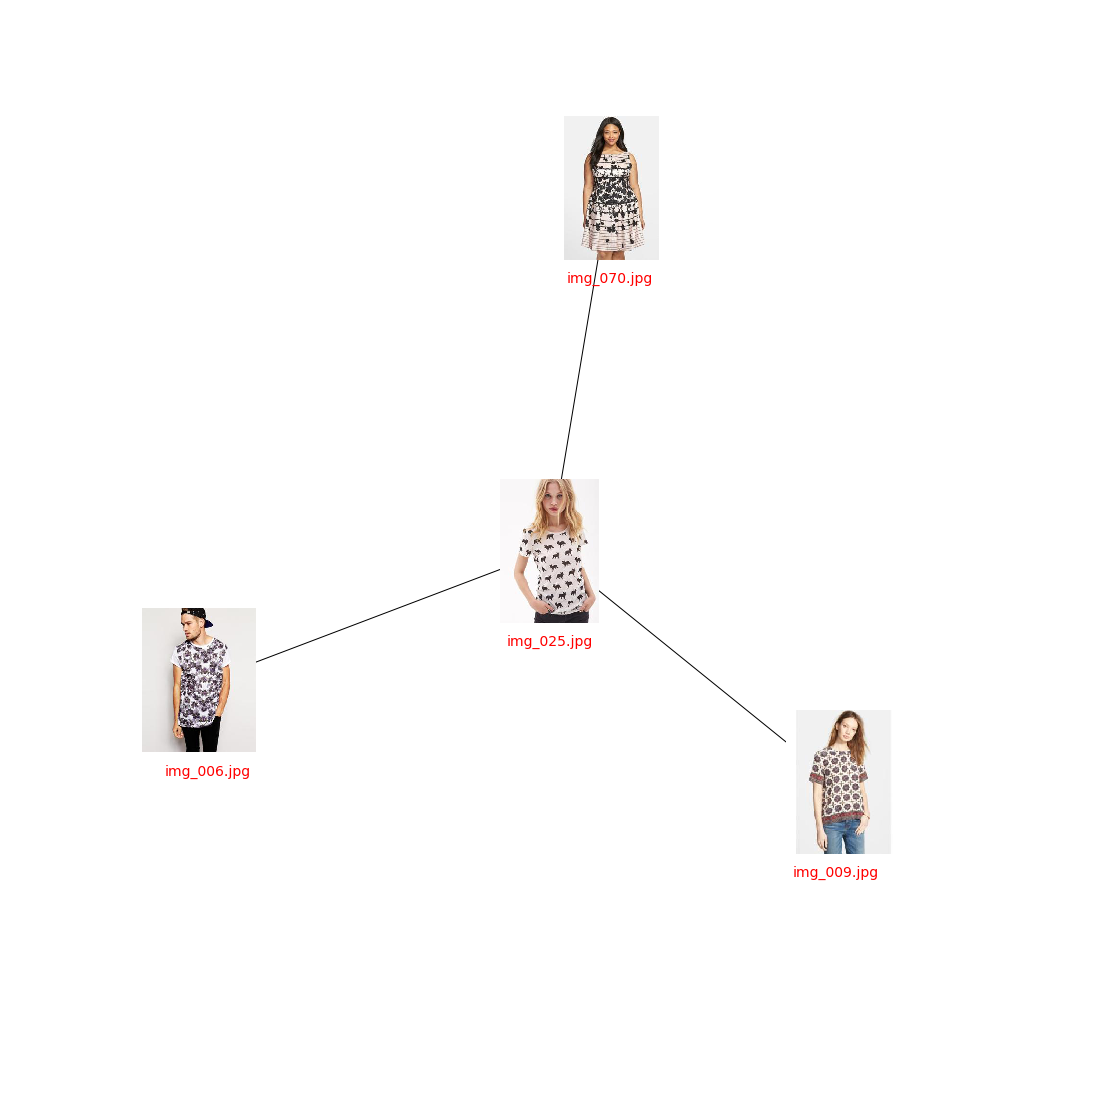

In [41]:
sw.show_node_neighbours(dm.get_img_index("img_025.jpg"), graph_name="025_node_neighbours.pdf");


This is a strong example of an image where the **pattern and color** features dominate the connections. All the neighbours present strong patterns and the color palette is of whites, blacks and browns. 

(58, img_058.jpg)


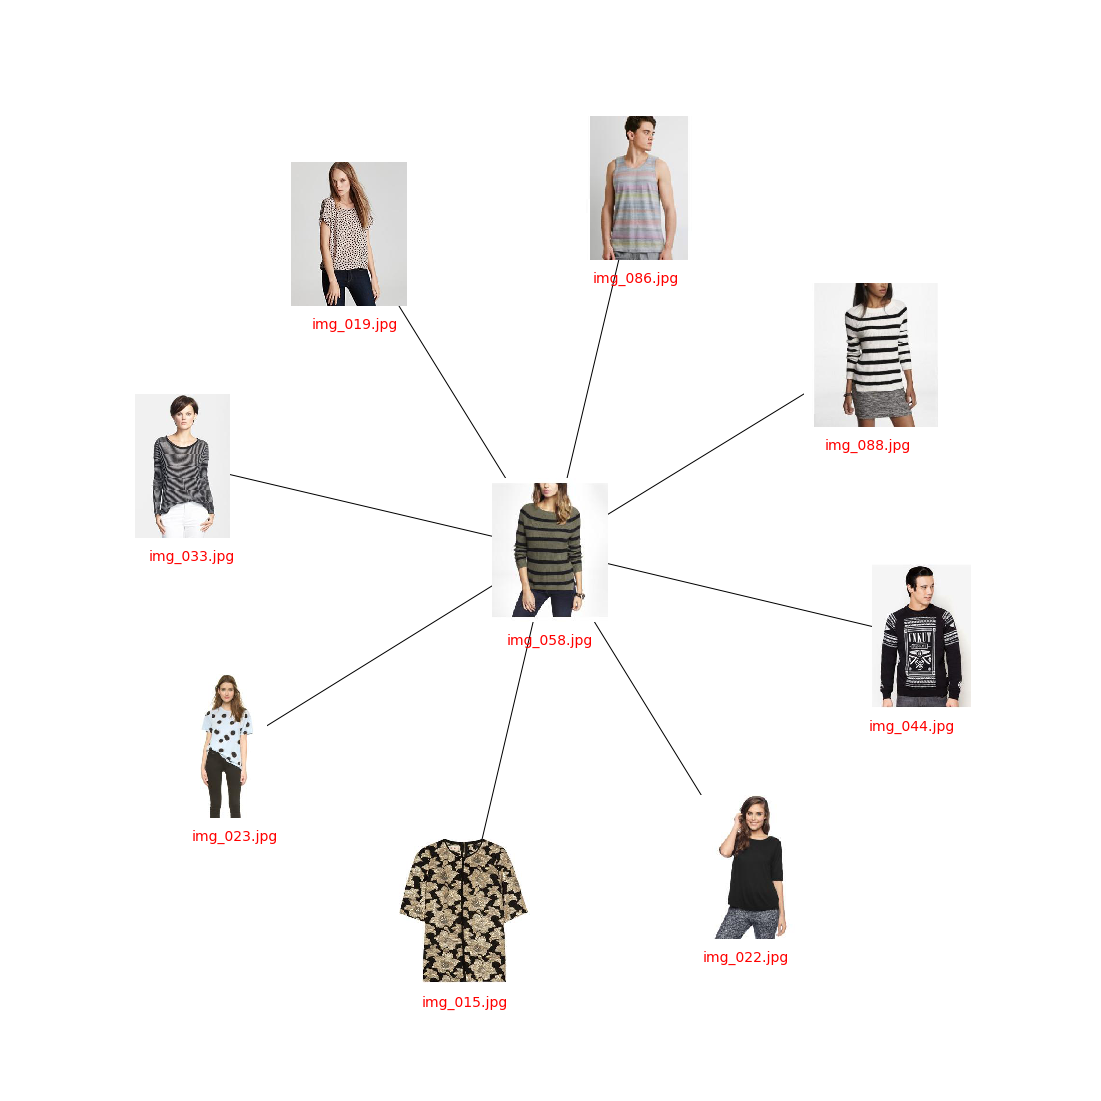

In [42]:
sw.show_node_neighbours(dm.get_img_index("img_058.jpg"), graph_name="058_node_neighbours.pdf");

This is an example of a **hub node**. As is clear, this image is connected to several others through several different characteristics. For example: 
* The connections to images 88, 86, 33 and 44 were based on the **stripe pattern**;
* The connections to images 19, 22 and 23 were based on the **shape of the bodies**;
* The connection to image 15 is based on the **color palette**.

## <a name="shortest_paths"></a>Visualizing shortest paths between two images

Below, we present some shortest paths between two images in the graph. These paths were computed by considering the final distance as the weight of the edges.

(8, img_008.jpg)
(86, img_086.jpg)


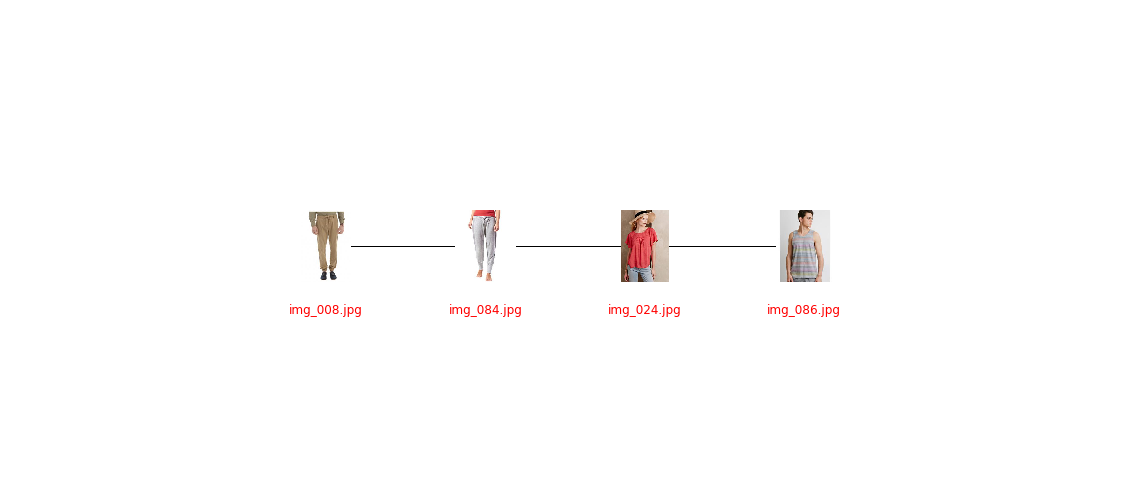

In [45]:
sw.show_shortest_path(dm.get_img_index("img_008.jpg"), dm.get_img_index("img_086.jpg"),
                      img_size=0.1, graph_name="img008_img086_path.pdf")

Initially, we see a connection based on the overall **shape of the pieces of clothing** (Image 8 to 84). Next, the change is most likely based on the **color**, because the shirts and pants of Image 84 and 24 have relatively similar tones. Lastly, the final connection is probably based on the **shape of the bodies**.

(25, img_025.jpg)
(21, img_021.jpg)


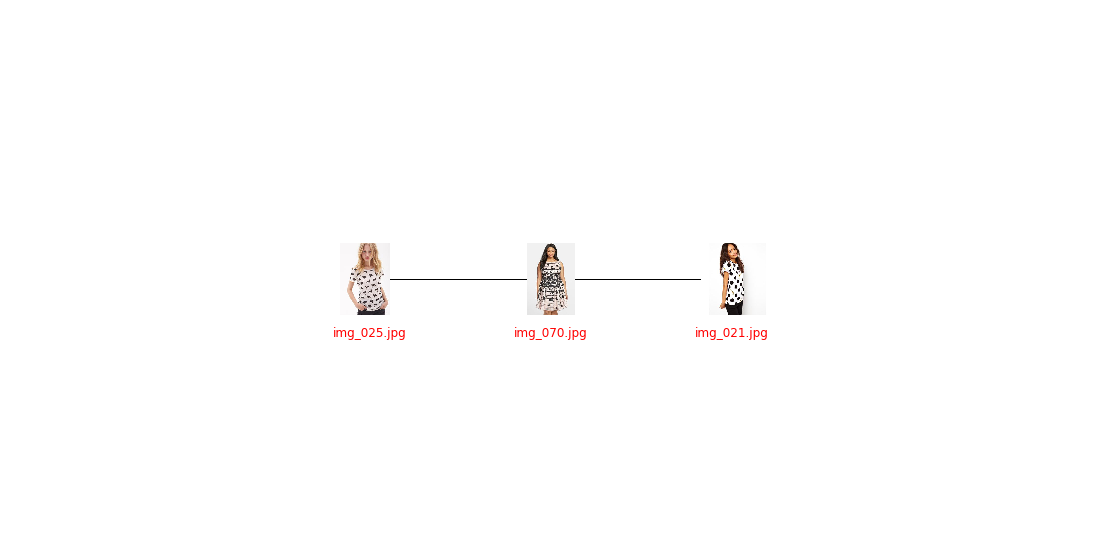

In [46]:
sw.show_shortest_path(dm.get_img_index("img_025.jpg"), dm.get_img_index("img_021.jpg"),
                      img_size=0.1, graph_name="img025_img021_path.pdf")

This path is shorter and it is clear that the **pattern detection and color features** heavily weighed these connections. This allows the user to browse similar items while maintaining the characteristics of the dominant attributes.